In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [5]:
os.chdir('C:\\Users\\kirti\\Downloads')

In [6]:
df = pd.read_csv('cubic_zirconia.csv')

### Solution 1.1-Exploratory Data Analysis

In [7]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [8]:
df.shape

(26967, 11)

In [9]:
df= df.drop('Unnamed: 0', axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [10]:
df.shape

(26967, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [12]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


In [13]:
df.skew()

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

In [14]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [15]:
dups = df.duplicated()
print('Number of Duplicate rows = %d' % (dups.sum()))
df[dups]

Number of Duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [16]:
df1 = df.copy()

df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [17]:
df1 = df1.drop_duplicates()
dups = df1.duplicated()
sum(dups)


0

In [18]:
df1.shape

(26933, 10)

In [19]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print(feature)
        print(df1[feature].value_counts())
        print('\n')

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64




### Univariate Analysis

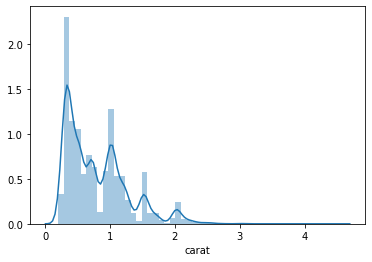

In [20]:
sns.distplot(df1['carat'])
plt.show()

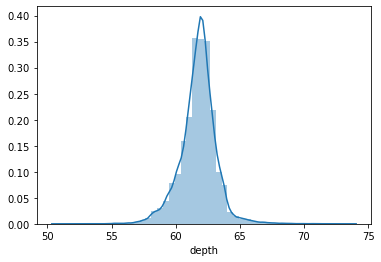

In [21]:
sns.distplot(df1['depth'])
plt.show()

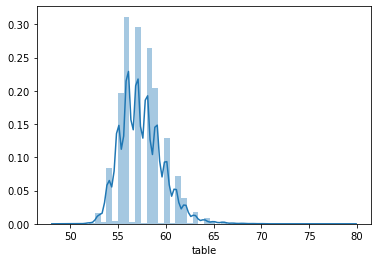

In [22]:
sns.distplot(df1['table'])
plt.show()

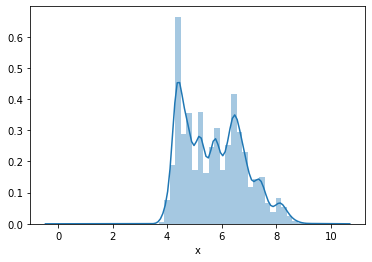

In [23]:
sns.distplot(df1['x'])
plt.show()

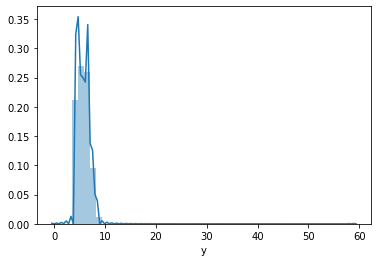

In [24]:
sns.distplot(df1['y'])
plt.show()

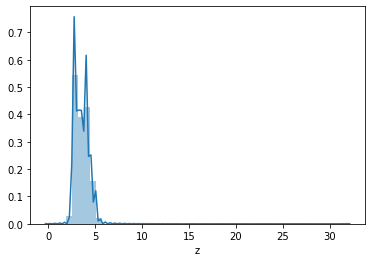

In [25]:
sns.distplot(df1['z'])
plt.show()

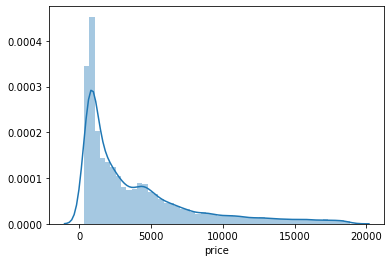

In [26]:
sns.distplot(df1['price'])
plt.show()

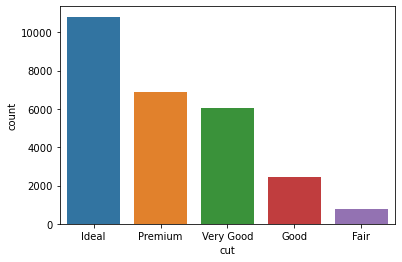

In [27]:
sns.countplot(df.cut)
plt.show()

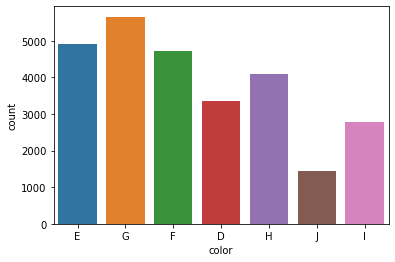

In [28]:
sns.countplot(df.color)
plt.show()

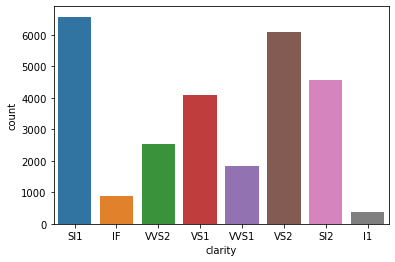

In [29]:
sns.countplot(df.clarity)
plt.show()

### Bivariate Analysis & Multivariate Analysis

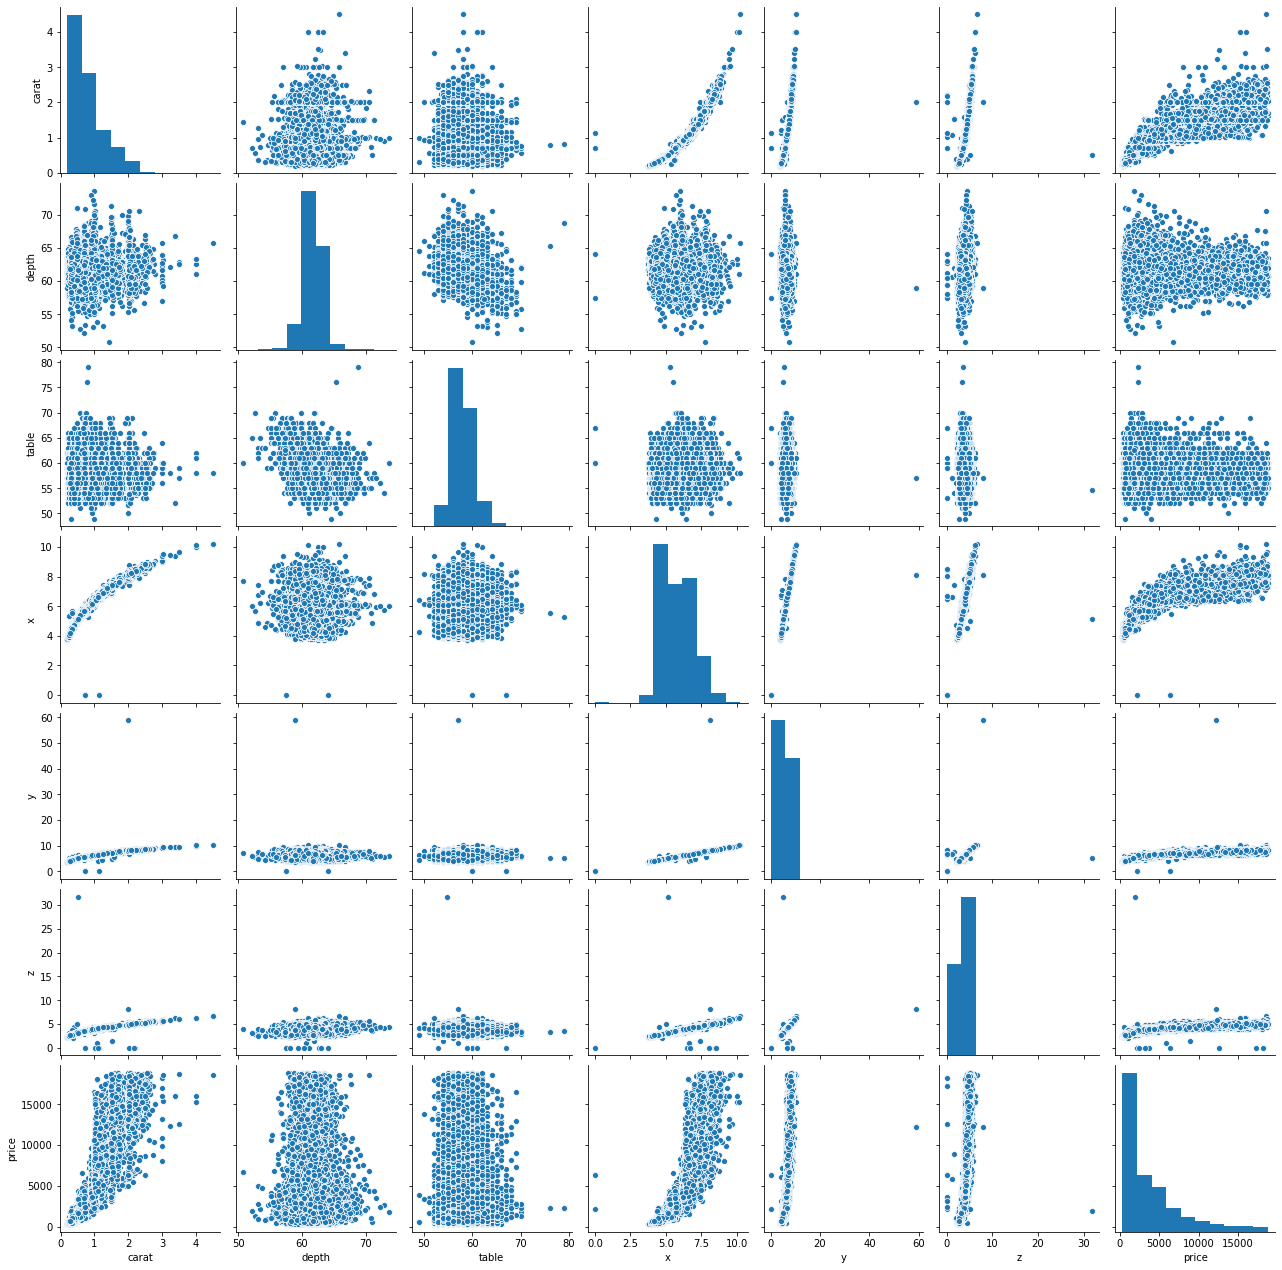

In [30]:
sns.pairplot(df1)

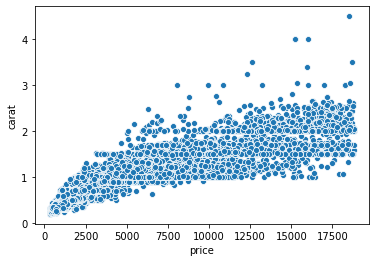

In [31]:
sns.scatterplot(df1['price'], df1['carat'])

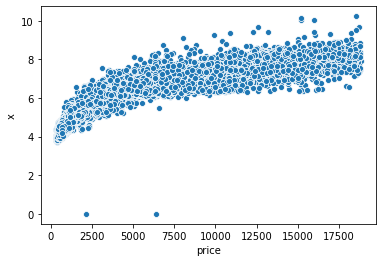

In [32]:
sns.scatterplot(df1['price'], df1['x'])

In [33]:
df1.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973,-0.002895
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002895,0.126844,0.886554,0.856441,0.850682,1.000000


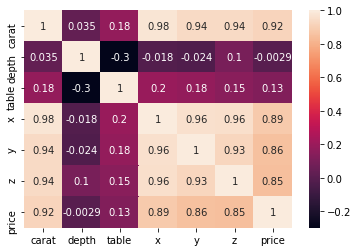

In [34]:
sns.heatmap(df1.corr(), annot=True)

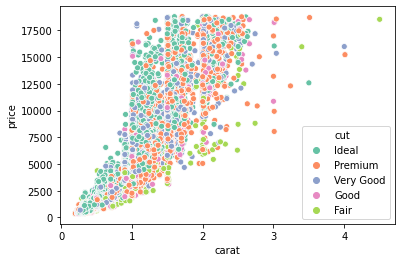

In [35]:
sns.scatterplot(df1['carat'], df1['price'], hue=df1['cut'], palette='Set2')

### Checking for Outliers

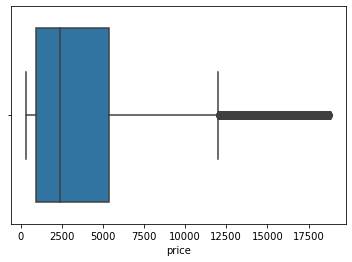

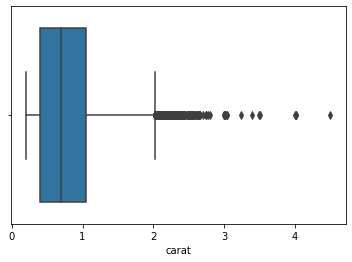

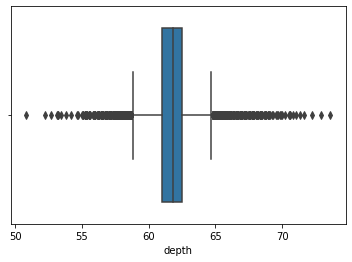

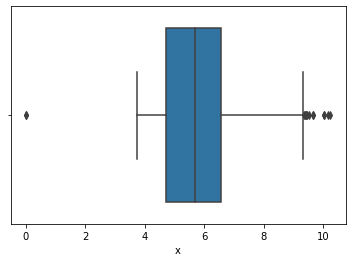

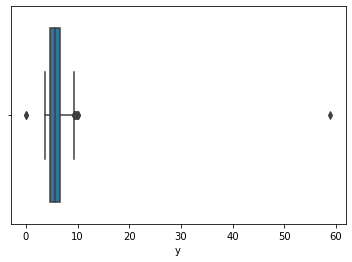

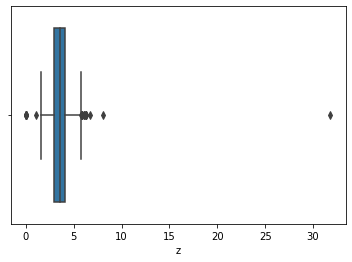

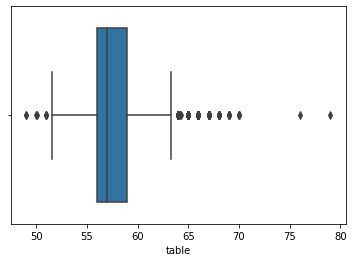

In [36]:
cols = ['price','carat','depth','x','y','z', 'table']
for i in cols:
    sns.boxplot(df1[i])
    plt.show();

### Solution 1.2, Impute null values

In [37]:
df1['depth'] = df1['depth'].fillna(df.depth.median())

In [38]:
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Check for the values which are equal to zero

In [39]:
for column in df1.columns:
    if df1[column].dtype == 'float64':
        print(column.upper(),':')
        print('Total Number of Values:', df1[column].count())
        print('Total Number of non null values :', np.count_nonzero(df1[column]))
        print()

CARAT :
Total Number of Values: 26933
Total Number of non null values : 26933

DEPTH :
Total Number of Values: 26933
Total Number of non null values : 26933

TABLE :
Total Number of Values: 26933
Total Number of non null values : 26933

X :
Total Number of Values: 26933
Total Number of non null values : 26931

Y :
Total Number of Values: 26933
Total Number of non null values : 26931

Z :
Total Number of Values: 26933
Total Number of non null values : 26925



In [40]:
df1[df1['x']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [41]:
df1[df1['y']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [42]:
df1[df1['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


### Outliers Treatment

In [43]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.5+ MB


In [45]:
cont=df1.dtypes[(df1.dtypes!='object')].index

In [46]:
for column in df1[cont].columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

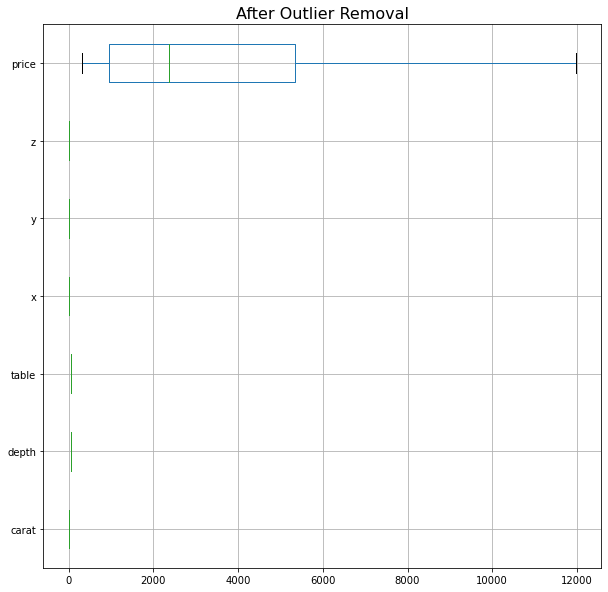

In [47]:
plt.figure(figsize=(10,10))
df1[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Checking for the observations having value of 0 after Outliers Treatment

In [48]:
for column in df1.columns:
    if df1[column].dtype == 'float64':
        print(column.upper(),':')
        print('Total Number of Values:', df1[column].count())
        print('Total Number of non null values :', np.count_nonzero(df1[column]))
        print()

CARAT :
Total Number of Values: 26933
Total Number of non null values : 26933

DEPTH :
Total Number of Values: 26933
Total Number of non null values : 26933

TABLE :
Total Number of Values: 26933
Total Number of non null values : 26933

X :
Total Number of Values: 26933
Total Number of non null values : 26933

Y :
Total Number of Values: 26933
Total Number of non null values : 26933

Z :
Total Number of Values: 26933
Total Number of non null values : 26933

PRICE :
Total Number of Values: 26933
Total Number of non null values : 26933



### Scaling the Data

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
std_scale= StandardScaler()
std_scale

StandardScaler()

In [51]:
df1_std = std_scale.fit_transform(df1[cont])


In [52]:
df1['carat'] = std_scale.fit_transform(df1[['carat']])
df1['depth'] = std_scale.fit_transform(df1[['depth']])
df1['table'] = std_scale.fit_transform(df1[['table']])
df1['x'] = std_scale.fit_transform(df1[['x']])
df1['y'] = std_scale.fit_transform(df1[['y']])
df1['z'] = std_scale.fit_transform(df1[['z']])
df1['price'] = std_scale.fit_transform(df1[['price']])

In [53]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067471,Ideal,E,SI1,0.286857,0.261676,-1.295847,-1.288982,-1.258616,-0.933304
1,-1.002552,Premium,G,IF,-0.780022,0.261676,-1.162650,-1.136943,-1.201206,-0.793460
2,0.230898,Very Good,E,VVS2,0.368925,1.188856,0.275874,0.347673,0.348871,0.736177
3,-0.807797,Ideal,F,VS1,-0.123481,-0.665503,-0.807459,-0.832865,-0.828039,-0.765203
4,-1.045831,Ideal,F,VVS1,-1.108292,0.725266,-1.224808,-1.163774,-1.272969,-0.852569


### Solution 1.3 - Encode the Data

In [54]:
df1 = pd.get_dummies(df1, columns=['cut','color','clarity'], drop_first=True)
df1.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.067471,0.286857,0.261676,-1.295847,-1.288982,-1.258616,-0.933304,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-1.002552,-0.780022,0.261676,-1.162650,-1.136943,-1.201206,-0.793460,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.230898,0.368925,1.188856,0.275874,0.347673,0.348871,0.736177,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.807797,-0.123481,-0.665503,-0.807459,-0.832865,-0.828039,-0.765203,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.045831,-1.108292,0.725266,-1.224808,-1.163774,-1.272969,-0.852569,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
df1.shape

(26933, 24)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26933 non-null  float64
 1   depth          26933 non-null  float64
 2   table          26933 non-null  float64
 3   x              26933 non-null  float64
 4   y              26933 non-null  float64
 5   z              26933 non-null  float64
 6   price          26933 non-null  float64
 7   cut_Good       26933 non-null  uint8  
 8   cut_Ideal      26933 non-null  uint8  
 9   cut_Premium    26933 non-null  uint8  
 10  cut_Very Good  26933 non-null  uint8  
 11  color_E        26933 non-null  uint8  
 12  color_F        26933 non-null  uint8  
 13  color_G        26933 non-null  uint8  
 14  color_H        26933 non-null  uint8  
 15  color_I        26933 non-null  uint8  
 16  color_J        26933 non-null  uint8  
 17  clarity_IF     26933 non-null  uint8  
 18  clarit

### Split the Data into Train and Test (70:30)

In [57]:
X = df1.drop('price', axis=1)
 
y = df1[['price']]

In [58]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Linear Regression Model

In [59]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [60]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2161199848933173
The coefficient for depth is -0.005249457886792318
The coefficient for table is -0.01155449151921565
The coefficient for x is -0.3864661127837549
The coefficient for y is 0.27004951286625967
The coefficient for z is -0.03298056416121785
The coefficient for cut_Good is 0.13892456139057535
The coefficient for cut_Ideal is 0.20607566754710668
The coefficient for cut_Premium is 0.19457851003926419
The coefficient for cut_Very Good is 0.17500102779332308
The coefficient for color_E is -0.05245006110110514
The coefficient for color_F is -0.07404838100259385
The coefficient for color_G is -0.12380787379022735
The coefficient for color_H is -0.24681517412522924
The coefficient for color_I is -0.38173883404873044
The coefficient for color_J is -0.5559304911880409
The coefficient for clarity_IF is 1.154514073127467
The coefficient for clarity_SI1 is 0.7265895921337304
The coefficient for clarity_SI2 is 0.4856954821722418
The coefficient for clarity

In [61]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.8463837661065596


In [62]:
# R square on training data
A1=regression_model.score(X_train, y_train)
print(A1)

0.9402044588687953


In [63]:
# R square or on testing data
A2=regression_model.score(X_test, y_test)
print(A2)

0.9419074345242372


In [64]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
R1= np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print(R1)

0.24435440092961688


In [65]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
R2=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print(R2)

0.2414302482986024


### Linear Regression using statsmodels

In [66]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test, y_test], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
22114,-0.980913,0.533060,1.188856,-1.171530,-1.154830,-1.115091,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.922347
2275,-1.067471,-0.451751,-1.129093,-1.224808,-1.271095,-1.272969,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.833827
19183,-0.634681,0.615128,-0.201914,-0.567705,-0.609279,-0.526636,0,1,0,0,...,0,0,0,1,0,0,0,0,0,-0.719645
5030,0.663688,1.271669,-0.665503,0.710983,0.759072,0.879916,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.094912
25414,0.490572,-0.533819,2.116035,0.719863,0.678581,0.635922,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.092605


In [67]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [68]:
data_train.rename(columns={'cut_Very Good': 'cut_Very_Good'}, inplace=True)
data_test.rename(columns={'cut_Very Good': 'cut_Very_Good'}, inplace=True)

In [69]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x + y + z+ cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept       -0.846384
carat            1.216120
depth           -0.005249
table           -0.011554
x               -0.386466
y                0.270050
z               -0.032981
cut_Good         0.138925
cut_Ideal        0.206076
cut_Premium      0.194579
cut_Very_Good    0.175001
color_E         -0.052450
color_F         -0.074048
color_G         -0.123808
color_H         -0.246815
color_I         -0.381739
color_J         -0.555930
clarity_IF       1.154514
clarity_SI1      0.726590
clarity_SI2      0.485695
clarity_VS1      0.963794
clarity_VS2      0.876530
clarity_VVS1     1.087702
clarity_VVS2     1.083513
dtype: float64

In [70]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.287e+04
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:20:46   Log-Likelihood:                -184.81
No. Observations:               18853   AIC:                             417.6
Df Residuals:                   18829   BIC:                             605.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8464      0.019    -44.475

In [71]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price', axis=1))-data_train['price'])**2)

In [72]:
#Root Mean Squared Error - RMSE on Training data
import math
R3=math.sqrt(mse)
print(R3)

0.2443544009296168


In [73]:
mse1 = np.mean((lm1.predict(data_test.drop('price', axis=1))-data_test['price'])**2)

In [74]:
#Root Mean Squared Error - RMSE on test data
import math

R4=math.sqrt(mse1)
print(R4)

0.24143024829860227


In [75]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

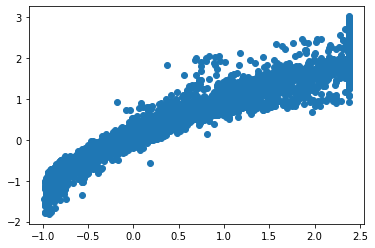

In [76]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [77]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.85) * Intercept + (1.22) * carat + (-0.01) * depth + (-0.01) * table + (-0.39) * x + (0.27) * y + (-0.03) * z + (0.14) * cut_Good + (0.21) * cut_Ideal + (0.19) * cut_Premium + (0.18) * cut_Very_Good + (-0.05) * color_E + (-0.07) * color_F + (-0.12) * color_G + (-0.25) * color_H + (-0.38) * color_I + (-0.56) * color_J + (1.15) * clarity_IF + (0.73) * clarity_SI1 + (0.49) * clarity_SI2 + (0.96) * clarity_VS1 + (0.88) * clarity_VS2 + (1.09) * clarity_VVS1 + (1.08) * clarity_VVS2 + 

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [80]:
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1


carat ---> 32.1374756230762
depth ---> 2.8285409008936258
table ---> 1.7714438026712793
x ---> 436.81477203015817
y ---> 427.6698478492437
z ---> 105.60464135442443
cut_Good ---> 3.5908592022885215
cut_Ideal ---> 14.303588024908414
cut_Premium ---> 8.603074330412786
cut_Very Good ---> 7.8317974948633164
color_E ---> 2.370259689844086
color_F ---> 2.3272183930878145
color_G ---> 2.6661301887836317
color_H ---> 2.201305851157817
color_I ---> 1.8683583092348006
color_J ---> 1.4815897853101248
clarity_IF ---> 2.1886146737584897
clarity_SI1 ---> 8.78108530190215
clarity_SI2 ---> 6.249806127721328
clarity_VS1 ---> 6.0111266868157305
clarity_VS2 ---> 8.379669637140529
clarity_VVS1 ---> 3.4175652257776856
clarity_VVS2 ---> 4.1696077122019854


In [81]:
index=['Accuracy','RMSE']
data = pd.DataFrame({'Linear Regression Train':[A1, R3],
                     'Linear Regression Test':[A2, R4]}, index = index)
round(data,4)

,Linear Regression Train,Linear Regression Test
Accuracy,0.9402,0.9419
RMSE,0.2444,0.2414


# Problem Statement 2: Logistic Regression and LDA

In [82]:
hp = pd.read_csv('Holiday_Package.csv')

### Solution 2.1 - Exploratory Data Analysis

In [83]:
hp.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [84]:
hp.shape

(872, 8)

In [85]:
hp = hp.drop('Unnamed: 0', axis=1)
hp.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [86]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [87]:
hp.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
hp.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [89]:
hp.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [90]:
dups = hp.duplicated()
print('Number of Duplicate rows = %d' % (dups.sum()))
hp[dups]

Number of Duplicate rows = 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [91]:
for feature in hp.columns: 
    if hp[feature].dtype == 'object': 
        print(feature)
        print(hp[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [92]:
hp.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

### Univariate Analysis

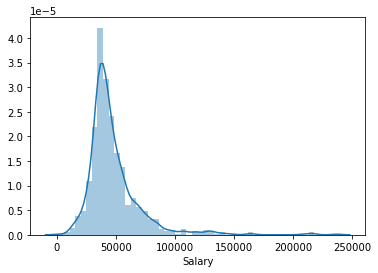

In [93]:
sns.distplot(hp['Salary'])
plt.show()

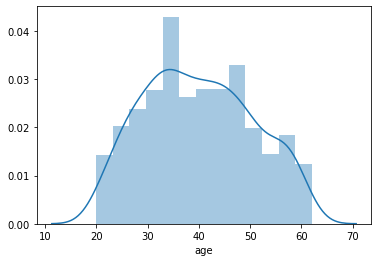

In [94]:
sns.distplot(hp['age'])
plt.show()

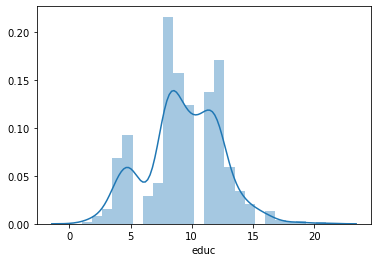

In [95]:
sns.distplot(hp['educ'])
plt.show()

C:\Users\kirti\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


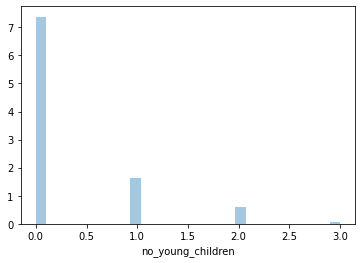

In [96]:
sns.distplot(hp['no_young_children'])
plt.show()

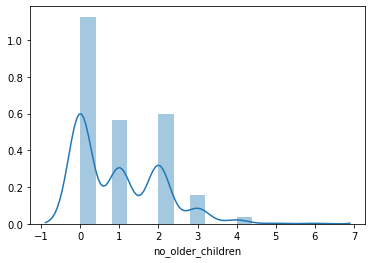

In [97]:
sns.distplot(hp['no_older_children'])
plt.show()

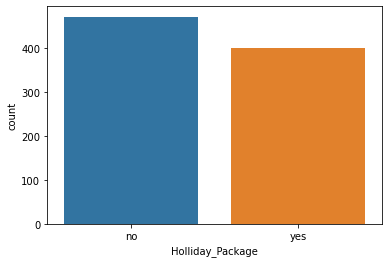

In [98]:
sns.countplot(hp.Holliday_Package)
plt.show()

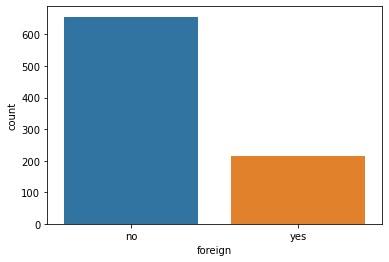

In [99]:
sns.countplot(hp.foreign)
plt.show()

### Biviarate Analysis And Multivariate Analysis

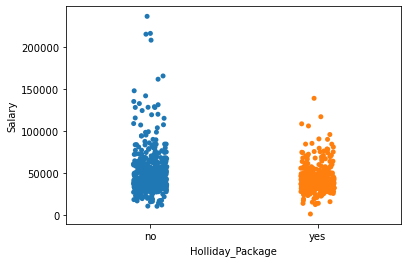

In [100]:
sns.stripplot(hp['Holliday_Package'], hp['Salary'])

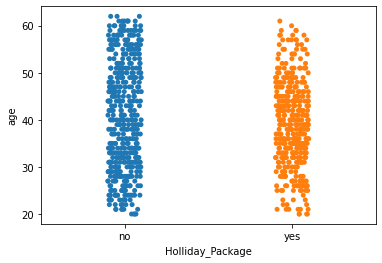

In [101]:
sns.stripplot(hp['Holliday_Package'], hp['age'])

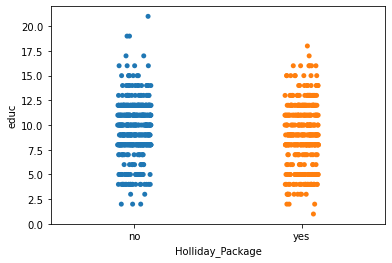

In [102]:
sns.stripplot(hp['Holliday_Package'], hp['educ'])

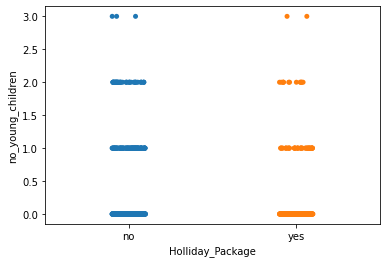

In [103]:
sns.stripplot(hp['Holliday_Package'], hp['no_young_children'])

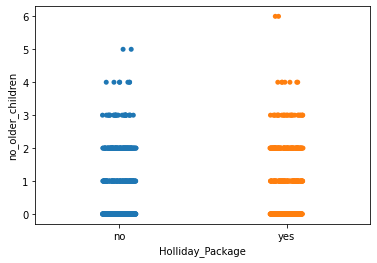

In [104]:
sns.stripplot(hp['Holliday_Package'], hp['no_older_children'])

Text(0, 0.5, 'foreign')

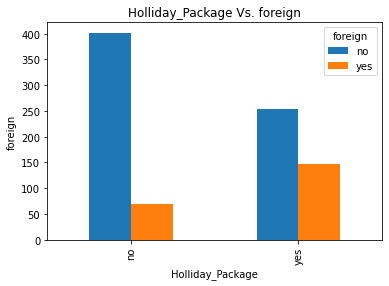

In [105]:
pd.crosstab(hp.Holliday_Package, hp.foreign).plot(kind='bar')
plt.title('Holliday_Package Vs. foreign')
plt.xlabel('Holliday_Package')
plt.ylabel('foreign')

C:\Users\kirti\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


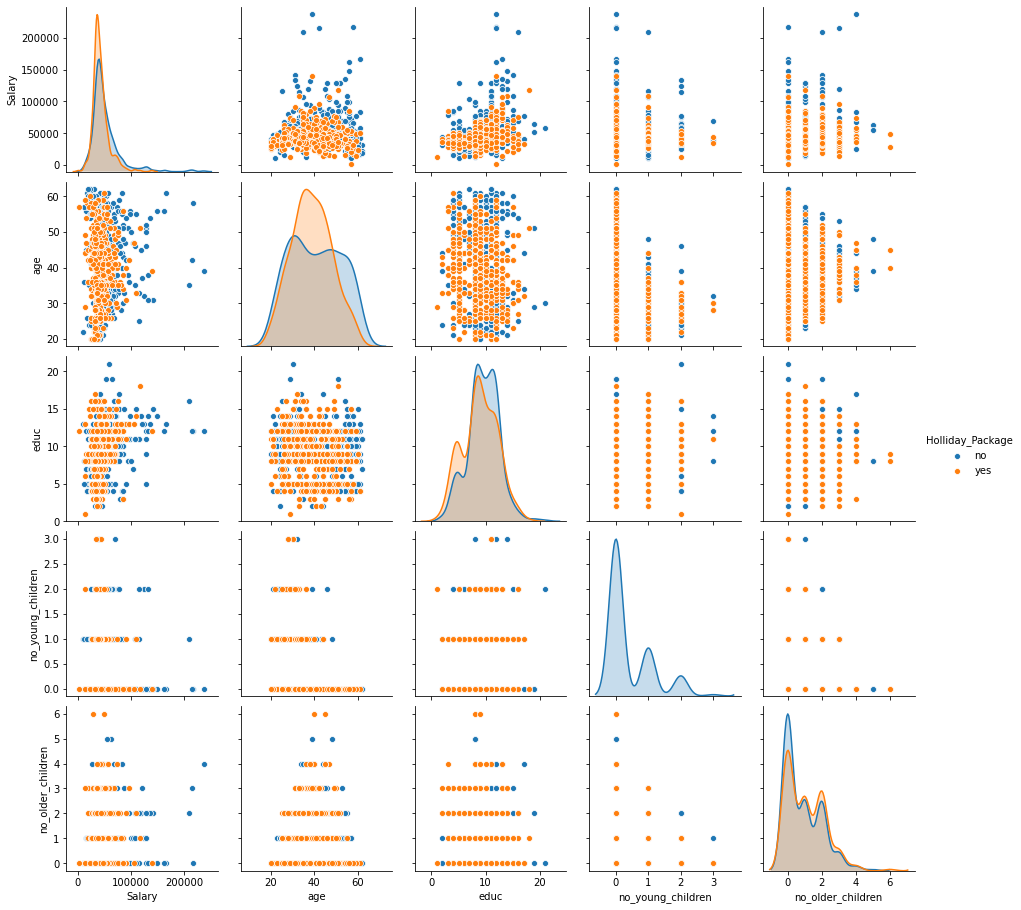

In [106]:
sns.pairplot(hp , hue='Holliday_Package')

In [107]:
hp.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


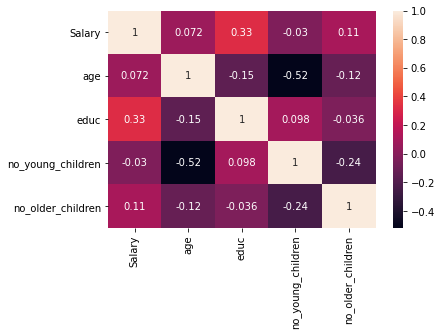

In [108]:
sns.heatmap(hp.corr(), annot=True)

### Checking for Outliers

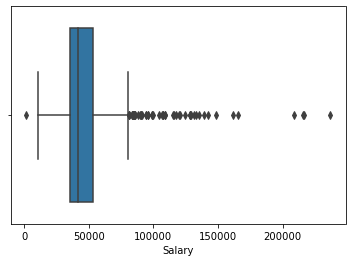

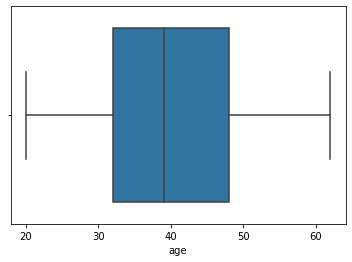

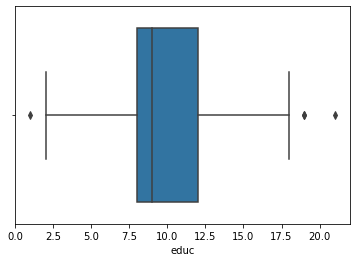

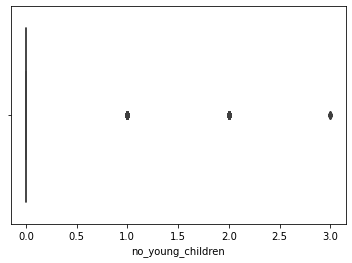

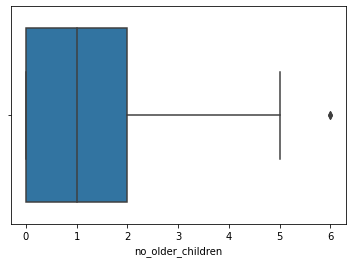

In [109]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(hp[i])
    plt.show();

### Outliers Treatmemt

In [110]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [111]:
cont=hp.dtypes[(hp.dtypes!='object')].index

In [112]:
for column in hp[cont].columns:
    lr,ur=remove_outlier(hp[column])
    hp[column]=np.where(hp[column]>ur,ur,hp[column])
    hp[column]=np.where(hp[column]<lr,lr,hp[column])

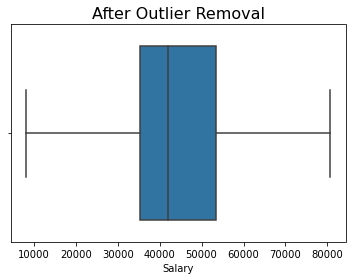

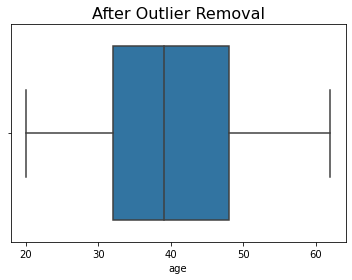

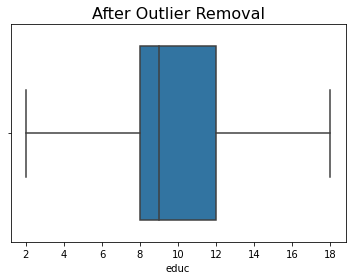

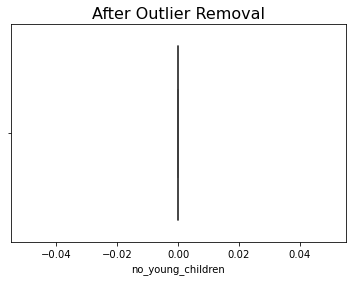

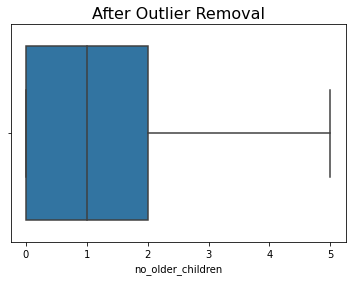

In [113]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(hp[i])
    plt.title('After Outlier Removal',fontsize=16)
    plt.show()

### Solution 2.2 - Encode the Data & Solution 2.3 - Performance Metrics

In [114]:
for feature in hp.columns:
    if hp[feature].dtype == 'object':
        print('\n')
        print('feature:', feature)
        print(pd.Categorical(hp[feature].unique()))
        print(pd.Categorical(hp[feature].unique()).codes)
        hp[feature]= pd.Categorical(hp[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [115]:
hp.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30.0,8.0,0.0,1.0,0
1,1,37207.0,45.0,8.0,0.0,1.0,0
2,0,58022.0,46.0,9.0,0.0,0.0,0
3,0,66503.0,31.0,11.0,0.0,0.0,0
4,0,66734.0,44.0,12.0,0.0,2.0,0


In [116]:
hp1 = hp.copy()
hp1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30.0,8.0,0.0,1.0,0
1,1,37207.0,45.0,8.0,0.0,1.0,0
2,0,58022.0,46.0,9.0,0.0,0.0,0
3,0,66503.0,31.0,11.0,0.0,0.0,0
4,0,66734.0,44.0,12.0,0.0,2.0,0


### Split the Data into Train and Test (70:30)

In [117]:
X = hp1.drop('Holliday_Package', axis=1)
 
y = hp1['Holliday_Package']

In [118]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [119]:
X_train.shape

(610, 6)

In [120]:
X_test.shape

(262, 6)

In [121]:
y_train.value_counts()

0    329
1    281
Name: Holliday_Package, dtype: int64

### Logistic Regression or Maximum Entrophy Classifier

In [122]:
model = LogisticRegression(solver='newton-cg', penalty='none', verbose= True, n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   11.4s finished


LogisticRegression(n_jobs=2, penalty='none', solver='newton-cg', verbose=True)

### Predicting on Training and Test dataset

In [123]:
ytrain_predict= model.predict(X_train)
ytest_predict= model.predict(X_test)

### Getting the Predicted Classes and Probs

In [124]:
ytrain_predict_prob = model.predict_proba(X_train)
ytest_predict_prob = model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.640764,0.359236
1,0.569909,0.430091
2,0.655265,0.344735
3,0.564147,0.435853
4,0.538869,0.461131


### Model Evaluation

In [125]:
# Accuracy - Training Data
model_score = model.score(X_train, y_train)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.6344262295081967


In [126]:
# Accuracy - Test Data
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.6603053435114504


### AUC and ROC for the training data

TypeError: 'numpy.ndarray' object is not callable

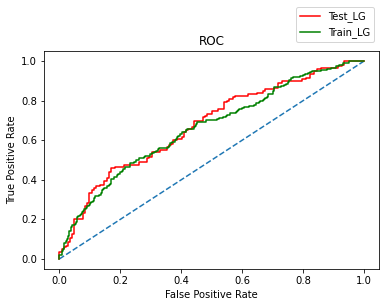

In [127]:
LG_train_fpr, LG_train_tpr,_=roc_curve(y_train,ytrain_predict_prob[:,1])
LG_test_fpr, LG_test_tpr,_=roc_curve(y_test,ytest_predict_prob[:,1])
#ROC Curve for the Training Data & Test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LG_test_fpr, LG_test_tpr,color='red',label="Test_LG")
plt.plot(LG_train_fpr,LG_train_tpr,color='green',label="Train_LG")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')


In [128]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       329
           1       0.65      0.45      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610



In [129]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.83      0.73       142
           1       0.70      0.46      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.64       262
weighted avg       0.67      0.66      0.65       262



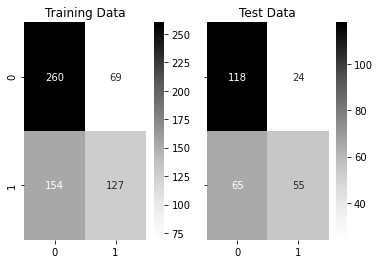

In [130]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Applying GridSearchCV for Logistic Regression

In [131]:
grid={'penalty':['l2','none'],
     'solver':['sag','lbfgs','liblinear','newton-cg'],
     'tol':[0.0001, 0.00001]}

In [132]:
model=LogisticRegression(max_iter=500,n_jobs=2)

In [133]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv=3, n_jobs= -1, scoring='f1')

In [134]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'liblinear', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [135]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=500, n_jobs=2, solver='newton-cg')


In [136]:
best_model = grid_search.best_estimator_

In [137]:
#Prediction on the Training Set
ytrain_predict1 = best_model.predict(X_train)
ytest_predict1 = best_model.predict(X_test)

In [138]:
## Getting the probabilites on the test set
ytest_predict_prob1=best_model.predict_proba(X_test)
ytrain_predict_prob1=best_model.predict_proba(X_train)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.640764,0.359236
1,0.569909,0.430091
2,0.655265,0.344735
3,0.564147,0.435853
4,0.538869,0.461131


In [139]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       329
           1       0.65      0.46      0.54       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610



In [140]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72       142
           1       0.69      0.46      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.64       262
weighted avg       0.66      0.66      0.64       262



In [141]:
# Accuracy - Training Data
model_score = best_model.score(X_train, y_train)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.6344262295081967


In [142]:
# Accuracy - Training Data
model_score = best_model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.6564885496183206


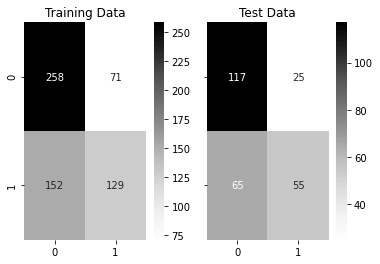

In [143]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


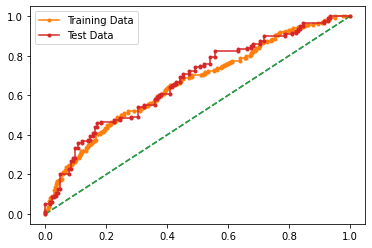

In [144]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,ytrain_predict_prob1[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
grid_LG_fpr_train, grid_LG_tpr_train, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(grid_LG_fpr_train, grid_LG_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,ytest_predict_prob1[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
grid_LG_fpr_test, grid_LG_tpr_test, thresholds = metrics.roc_curve(y_test,ytest_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(grid_LG_fpr_test, grid_LG_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

 ### Linear Discriminant Analysis or LDA

In [145]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

### Predicting on Training and Test dataset

In [146]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

### Probability prediction for the training and test data

In [147]:
pred_prob_train = model.predict_proba(X_train)
pred_prob_test = model.predict_proba(X_test)

In [148]:
pd.DataFrame(pred_prob_test).head()

,0,1
0,0.644519,0.355481
1,0.574252,0.425748
2,0.658803,0.341197
3,0.567407,0.432593
4,0.542866,0.457134


In [149]:
# Accuracy - Training Data
model_score = model.score(X_train, y_train)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.6327868852459017


In [150]:
# Accuracy - Training Data
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.6564885496183206


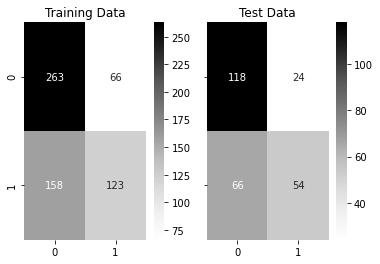

In [151]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [152]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610
 



In [153]:
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


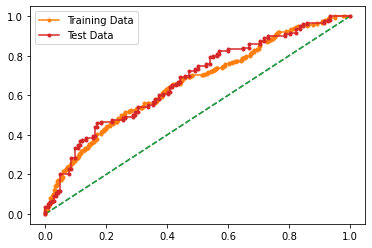

In [154]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
LDA_fpr_train, LDA_tpr_train, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_fpr_train, LDA_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
LDA_fpr_test, LDA_tpr_test, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_fpr_test, LDA_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.1 

Accuracy Score 0.4607
F1 Score 0.6308 

Confusion Matrix


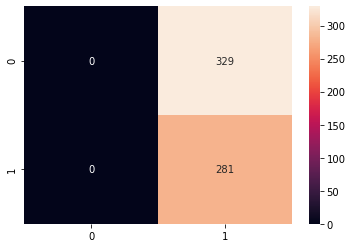

0.2 

Accuracy Score 0.4738
F1 Score 0.6365 

Confusion Matrix


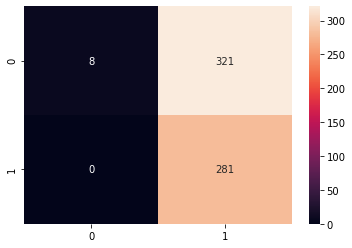

0.3 

Accuracy Score 0.5344
F1 Score 0.6485 

Confusion Matrix


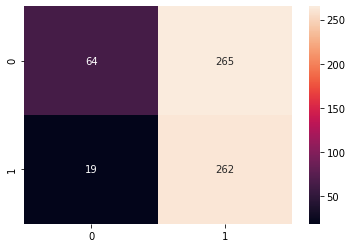

0.4 

Accuracy Score 0.5787
F1 Score 0.6088 

Confusion Matrix


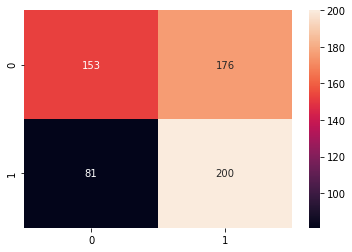

0.5 

Accuracy Score 0.6328
F1 Score 0.5234 

Confusion Matrix


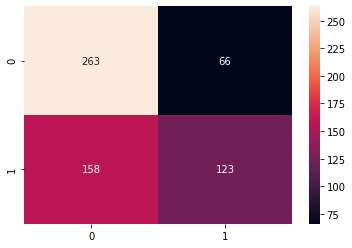

0.6 

Accuracy Score 0.6213
F1 Score 0.446 

Confusion Matrix


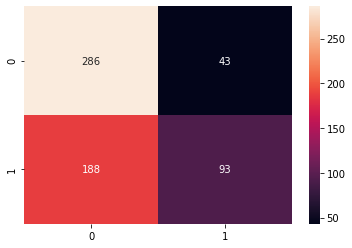

0.7 

Accuracy Score 0.5869
F1 Score 0.2455 

Confusion Matrix


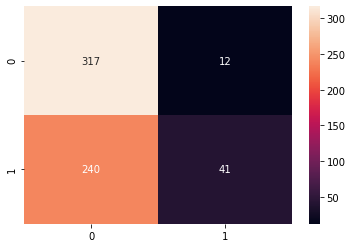

0.8 

Accuracy Score 0.541
F1 Score 0.0071 

Confusion Matrix


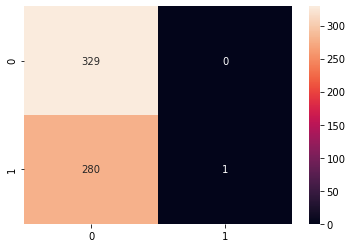

0.9 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


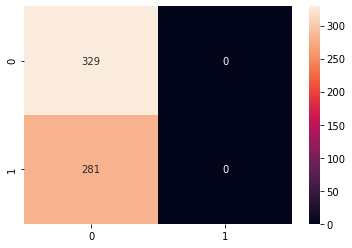

In [155]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j 
    custom_cutoff_data=[]
    for i in range(0,len(y_train)):
        if np.array(pred_prob_train[:,1])[i] > custom_prob:
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [156]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>=0.3:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

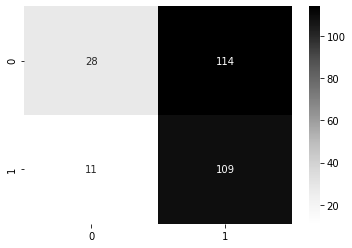

In [157]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [158]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.72      0.20      0.31       142
           1       0.49      0.91      0.64       120

    accuracy                           0.52       262
   macro avg       0.60      0.55      0.47       262
weighted avg       0.61      0.52      0.46       262
 



## Comparison of the performance metrics from the Logistic Regression & Linear Discriminat Model

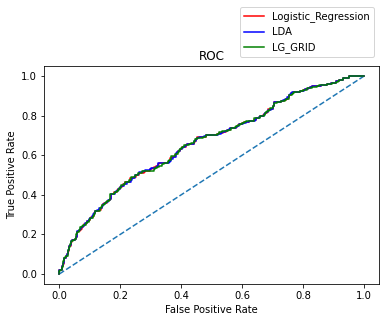

In [159]:
#ROC Curve for the models on the Training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LG_train_fpr, LG_train_tpr,color='red',label="Logistic_Regression")
plt.plot(LDA_fpr_train,LDA_tpr_train,color='blue',label="LDA")
plt.plot(grid_LG_fpr_train, grid_LG_tpr_train,color='green',label="LG_GRID")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

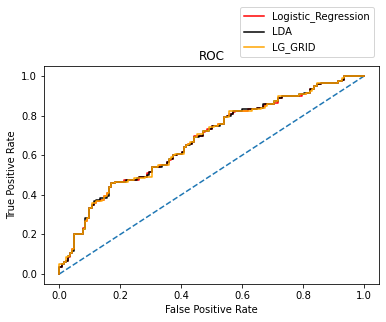

In [160]:
#ROC Curve for the  models on the Test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LG_test_fpr, LG_test_tpr,color='red',label="Logistic_Regression")
plt.plot(LDA_fpr_test,LDA_tpr_test,color='black',label="LDA")
plt.plot(grid_LG_fpr_test, grid_LG_tpr_test,color='orange',label="LG_GRID")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')